## Máquinas de soporte vectorial (SVM)

Es un algoritmo de aprendizaje supervisado donde el objetivo es maximizar el margen definido por la distancia entre el hiperplano de separación y los puntos (de los datos de entrenamiento) más cercanas al hiperplano. Estos puntos son denominados _vectores soporte_.

La idea que hay detrás de las SVM de _margen máximo_ consiste en seleccionar el hiperplano separador que está a la misma distancia de los puntos más cercanos de cada clase.

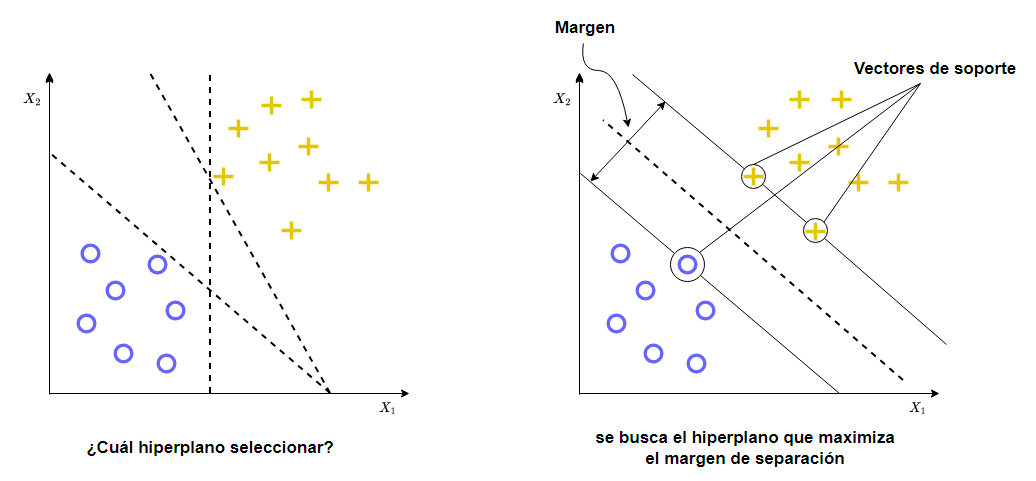

In [1]:
from IPython.display import Image

display(Image(filename='./2_imagenes/SVM_1.png', width=700))

Las SVM tienen en su implementación una variable de holgura _C_ que permite que las restricciones no se cumplan de manera estricta. Esto es necesario en el caso de conjuntos que no son linealmente separables.

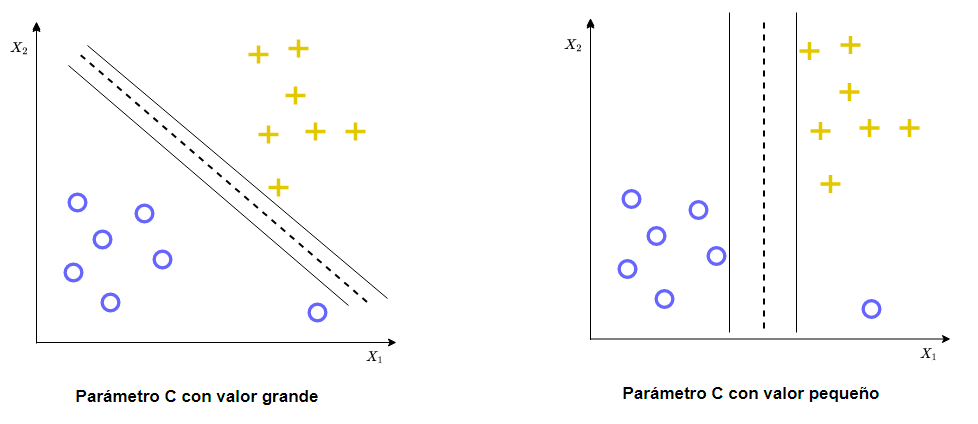

In [2]:
display(Image(filename='./2_imagenes/SVM_2.png', width=700))

Es un modelo muy sensible a la diferencia de escalas de los atributos

A continuación vamos a usar las SVM con algunos datasets guardados en la carpeta `1_datos`

In [3]:
# importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from modulos.graficacion import plot_decision_regions

### Dataset Nº 1

In [4]:
# Dataset data1.mat
import scipy.io as sio
archivo_mat = sio.loadmat('1_datos/data1.mat')

X = archivo_mat['X']
y = archivo_mat['y'].flatten()


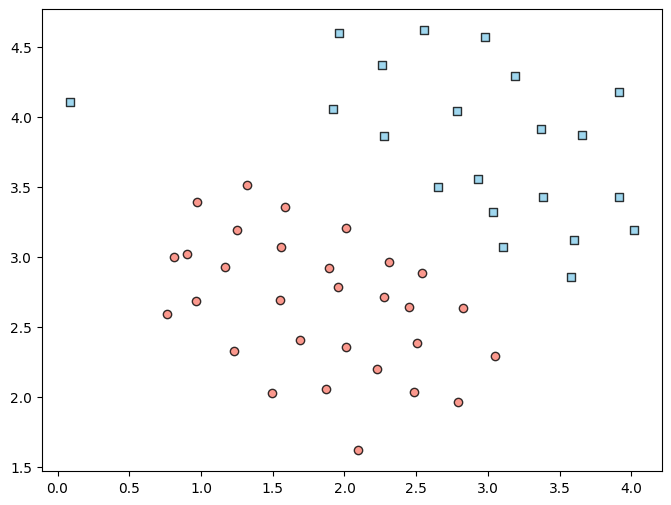

In [5]:
# Visualizamos los datos
markers = ('o', 's', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
plt.show()

Este dataset es linealmente separable. Notar que se tiene un outlier en una de las clases.

Probar con diferentes valores del parámetro C de la clase [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) de scikit-learn y ver qué efecto tiene la presencia del outlier en la región de separación.

In [6]:
#Separamos los Datos 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Escalamos los datos
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X)
x_train_std= sc.transform(x_train)
x_test_std= sc.transform(x_test)


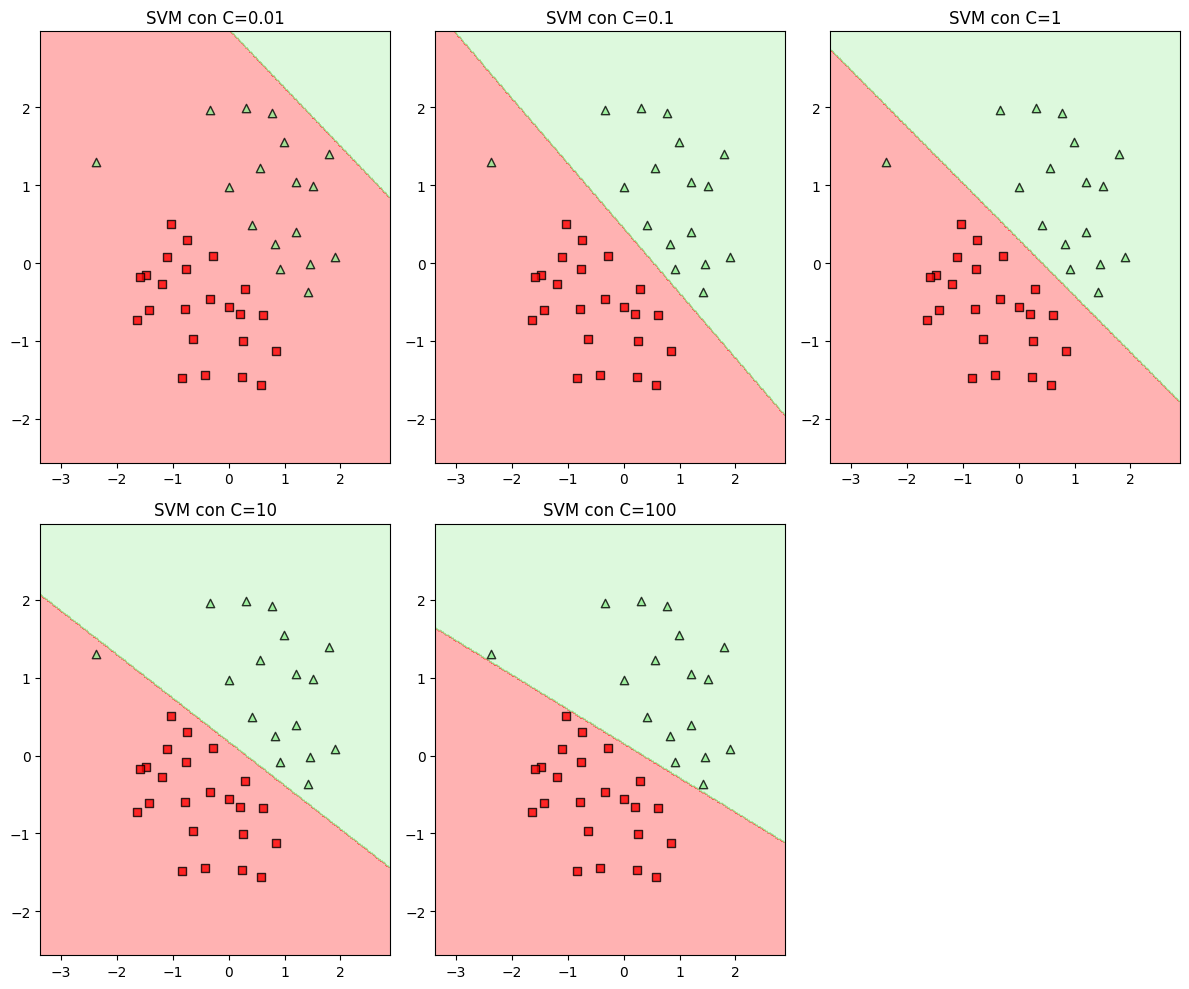

In [8]:
#Entrenamos diferentes SVM y visualizamos el resultado con plot_decision_regions
from sklearn.svm import SVC

#valores de C
C_values = [0.01, 0.1, 1, 10, 100]
plt.figure(figsize=(12, 10))

for i, C in enumerate(C_values, 1):
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(x_train_std, y_train)
    
    plt.subplot(2, 3, i)
    plot_decision_regions(x_train_std, y_train,svm_model) #Visualisamos los datos
    plt.title(f'SVM con C={C}')
    
plt.tight_layout()
plt.show()

### Dataset Nº 2
### SVM con kernel Gaussiano

In [9]:
# Dataset data2.mat
archivo_mat_2 = sio.loadmat('1_datos/data2.mat')
X_2 = archivo_mat_2['X']
y_2 = archivo_mat_2['y'].flatten()
X_2.shape

(863, 2)

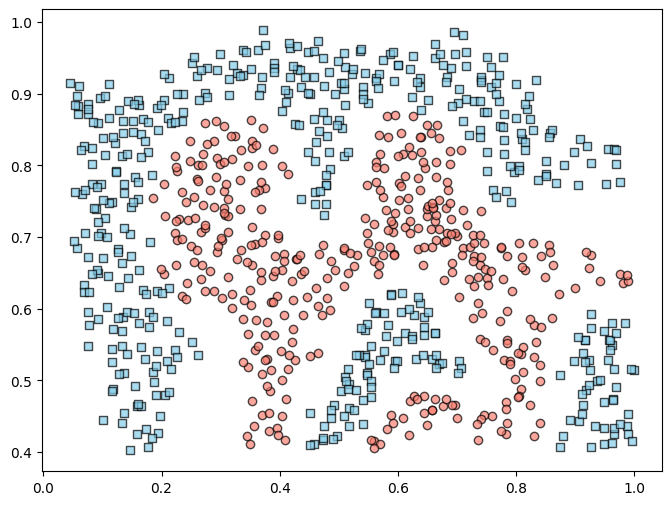

In [10]:
# Visualizamos los datos
markers = ('o', 's', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y_2)):
    plt.scatter(x=X_2[y_2 == cl, 0],
                y=X_2[y_2 == cl, 1],
                alpha=0.7,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

Como verá de la gráfica, los datos no son linealmente separables. Con el kernel Gaussiano, el algoritmo del SVM podrá encontrar la región de decisión capaz de separar los datos correctamente y seguir los contornos del dataset.

In [11]:
#Separamos los Datos 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

#Escalamos los datos
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(X)
x_train_std= sc.transform(x_train)
x_test_std= sc.transform(x_test)

Uno de los _kernels_ más utilizado es el __radial basis function__ (RBF), que se conoce como __kernel Gaussiano__. Vea la documentación de la clase [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) para utilizar este kernel.

Un parámetro adicional al utilizar este kernel es el parámetro **gamma**. Este indica cuánta influencia tiene una sola muestra, haciendo que el límite de decisión se ajuste mucho más a las muestras. **Pruebe con diferentes valores de gamma para ver el efecto del mismo.**

La idea principal detrás del uso de _kernels_ con datos que no son linealmente separables, es crear combinaciones no lineales de las características originales y proyectarlas en un espacio de mayor dimensión (mapeo mediante una función), donde los datos se vuelven linealmente separables

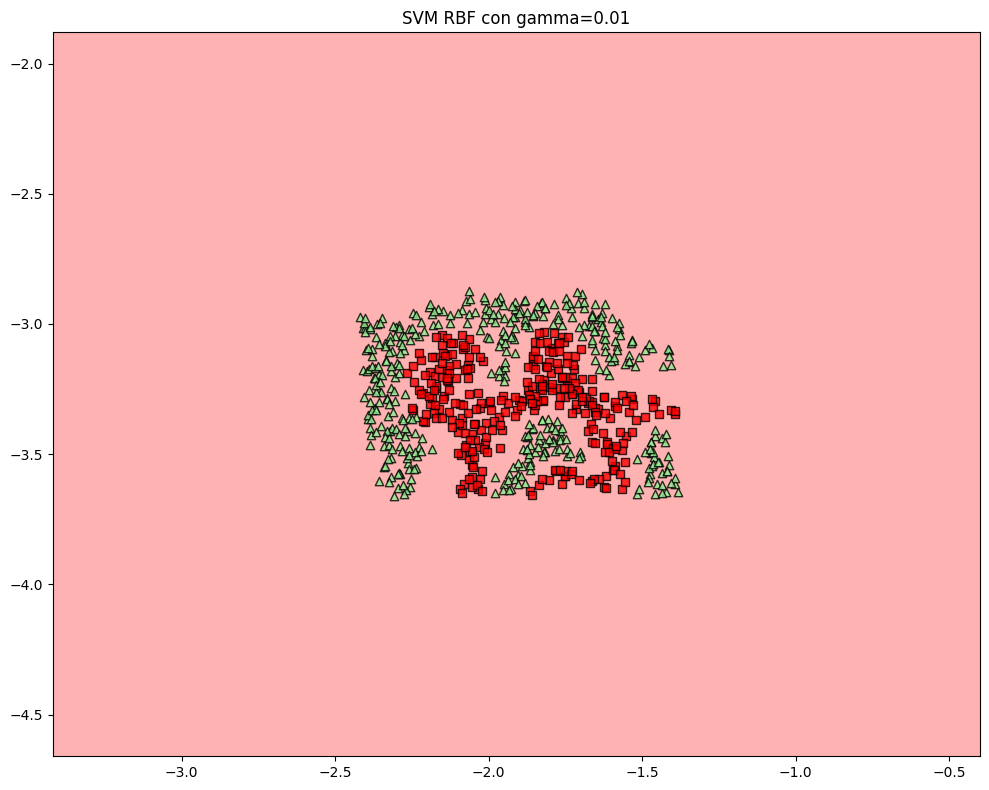

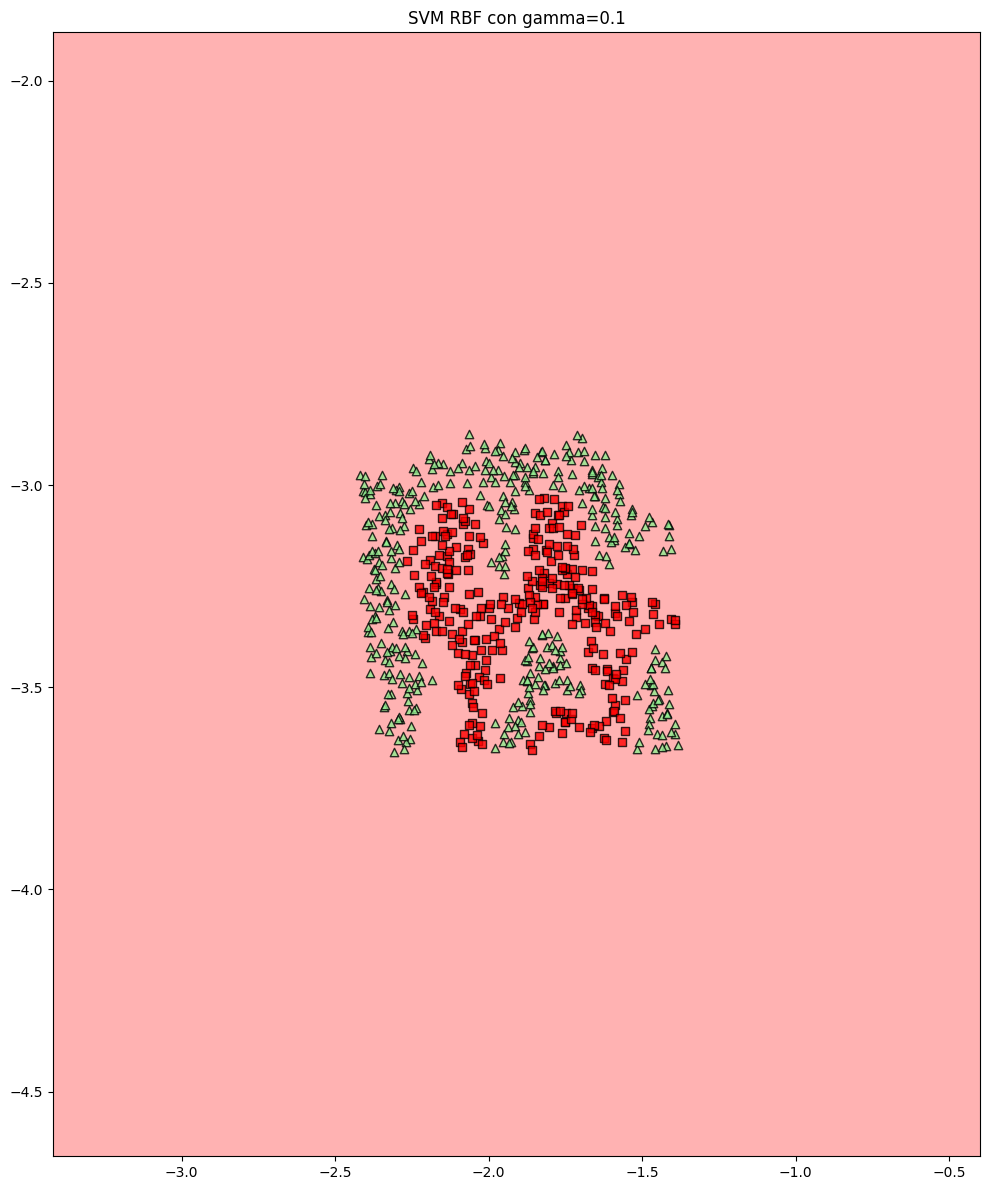

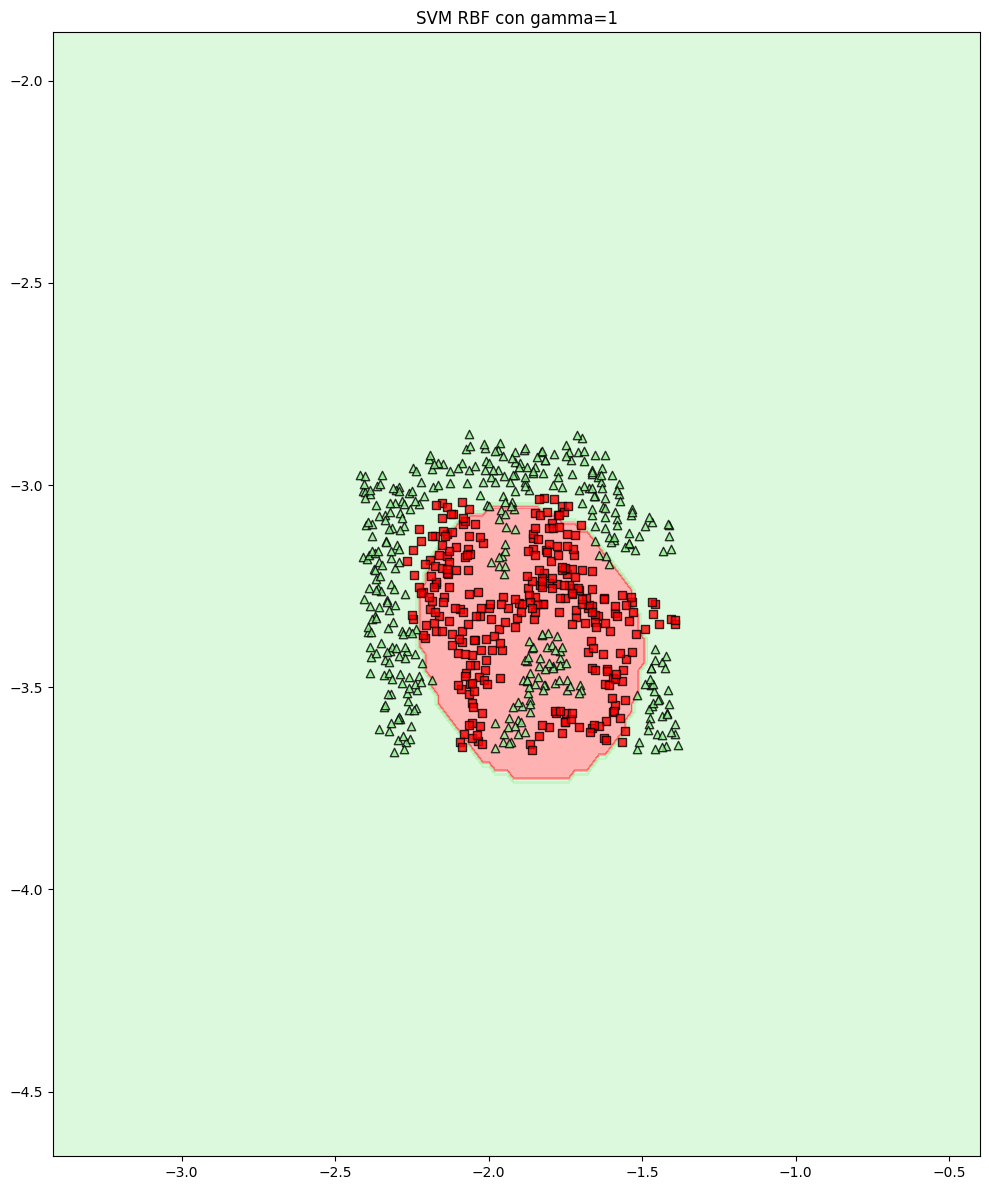

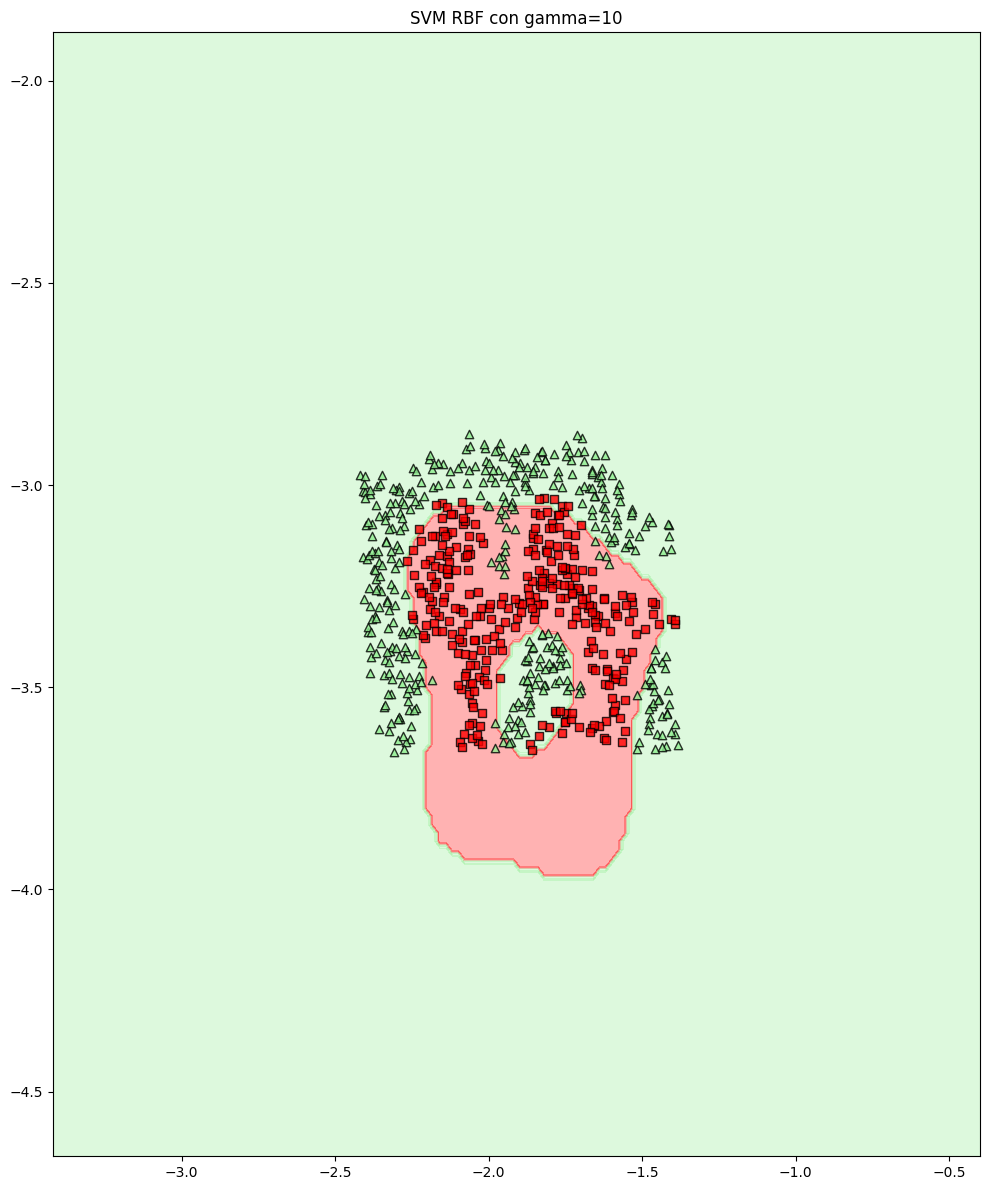

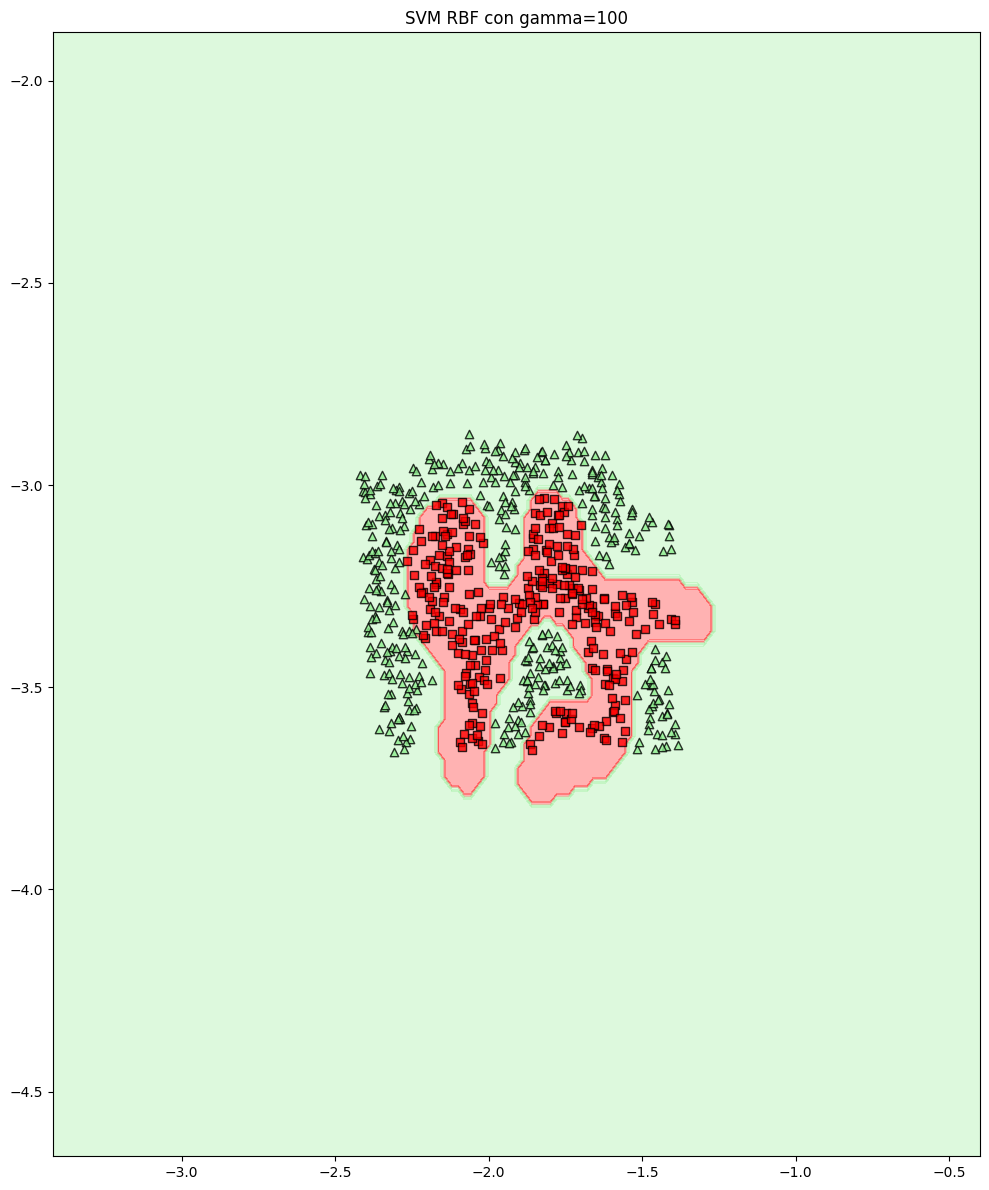

<Figure size 1000x1200 with 0 Axes>

In [12]:
#Entrenamos diferentes SVM y visualizamos el resultado con plot_decision_regions
# Probar diferentes combinaciones de gamma

gamma_values = [0.01, 0.1, 1, 10, 100]

plt.figure(figsize=(10, 8))

for i, gamma in enumerate(gamma_values, start=1):
    svm_model = SVC(kernel='rbf', C=1, gamma=gamma)
    svm_model.fit(x_train_std, y_train)
    
    
    plot_decision_regions(x_train_std, y_train,svm_model)
    plt.title(f'SVM RBF con gamma={gamma}')

    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 12))

### Dataset Nº 3
El siguiente dataset _data3.mat_ posee datos para entrenamiento (_X_, _y_) y datos de prueba (_X_test_, _y_test_)

In [13]:
# Dataset data2.mat
archivo_mat_3 = sio.loadmat('1_datos/data3.mat')
print(type(archivo_mat_3))
print(archivo_mat_3.keys())
X_3 = archivo_mat_3['X']
y_3 = archivo_mat_3['y'].flatten()
X_test_3 = archivo_mat_3['Xval']
y_test_3 = archivo_mat_3['yval'].flatten()
print(X_3.shape)
print(X_test_3.shape)

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])
(211, 2)
(200, 2)


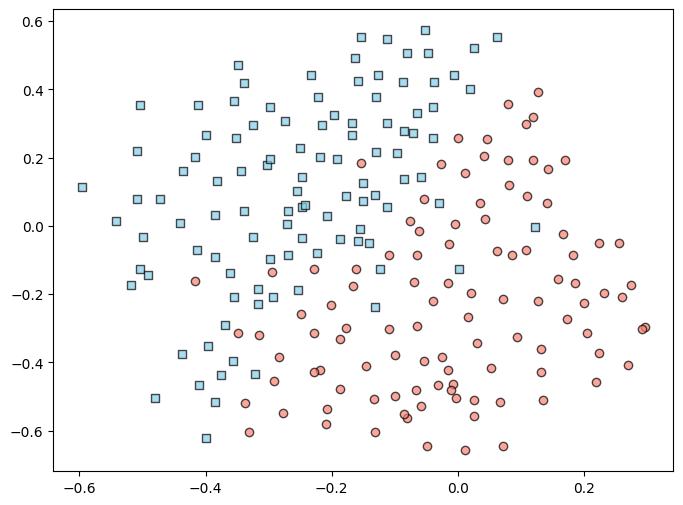

In [14]:
# Visualizamos los datos de entrenamiento
markers = ('o' ,'s', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y_3)):
    plt.scatter(x=X_3[y_3 == cl, 0],
                y=X_3[y_3 == cl, 1],
                alpha=0.7,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

Este conjunto de datos no es linealmente separable. Una forma de obtener los mejores parámetros de una SVM para resolver este problema, es hacer una búsqueda en cuadrícula (GridSearch). Implemente un algoritmo que evalue SVMs con diferentes parámetros mediante validación cruzada (utilice la función [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) con 5 particiones). Obtenga la combinación de valores de C y gamma que resulte en un mejor desempeño de la SVM.

In [15]:
sc = StandardScaler()
sc.fit(X_3)
X_3_std = sc.transform(X_3)
X_test_3_std = sc.transform(X_test_3)
X_3_std.shape

(211, 2)

In [16]:
from sklearn.model_selection import cross_val_score

valores_C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
valores_gamma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 300]

#------------------------------------
# Variable para almacenar los mejores parámetros y el mejor puntaje
mejor_puntaje = 0
mejores_parametros = {'C': None, 'gamma': None}
# Bucle para probar diferentes combinaciones de C y gamma
for C in valores_C:
    for gamma in valores_gamma:
        # Definir el modelo SVM con los parámetros actuales
        svm = SVC(kernel='rbf',C=C, gamma=gamma)
        
        # Evaluar el modelo usando validación cruzada de 5 particiones
        puntajes = cross_val_score(svm, X_3_std, y_3, cv=5, scoring='accuracy')
        
        # Calcular el puntaje promedio de la validación cruzada
        puntaje_promedio = np.mean(puntajes)
        
        # Imprimir resultados parciales (opcional, para monitorear el progreso)
        print(f"C: {C}, gamma: {gamma}, Puntaje promedio: {puntaje_promedio:.4f}")
        
        # Actualizar los mejores parámetros si se encuentra un mejor puntaje
        if puntaje_promedio > mejor_puntaje:
            mejor_puntaje = puntaje_promedio
            mejores_parametros['C'] = C
            mejores_parametros['gamma'] = gamma

# Imprimir los mejores parámetros y el mejor puntaje
print("Mejores parámetros:", mejores_parametros)
print("Mejor puntaje de validación cruzada:", mejor_puntaje)



C: 0.01, gamma: 0.01, Puntaje promedio: 0.5721
C: 0.01, gamma: 0.03, Puntaje promedio: 0.5721
C: 0.01, gamma: 0.1, Puntaje promedio: 0.5721
C: 0.01, gamma: 0.3, Puntaje promedio: 0.5767
C: 0.01, gamma: 1, Puntaje promedio: 0.5767
C: 0.01, gamma: 3, Puntaje promedio: 0.5767
C: 0.01, gamma: 10, Puntaje promedio: 0.5767
C: 0.01, gamma: 30, Puntaje promedio: 0.5674
C: 0.01, gamma: 300, Puntaje promedio: 0.5163
C: 0.03, gamma: 0.01, Puntaje promedio: 0.5721
C: 0.03, gamma: 0.03, Puntaje promedio: 0.5721
C: 0.03, gamma: 0.1, Puntaje promedio: 0.8340
C: 0.03, gamma: 0.3, Puntaje promedio: 0.8720
C: 0.03, gamma: 1, Puntaje promedio: 0.8434
C: 0.03, gamma: 3, Puntaje promedio: 0.5767
C: 0.03, gamma: 10, Puntaje promedio: 0.5767
C: 0.03, gamma: 30, Puntaje promedio: 0.5674
C: 0.03, gamma: 300, Puntaje promedio: 0.5163
C: 0.1, gamma: 0.01, Puntaje promedio: 0.5721
C: 0.1, gamma: 0.03, Puntaje promedio: 0.8626
C: 0.1, gamma: 0.1, Puntaje promedio: 0.8530
C: 0.1, gamma: 0.3, Puntaje promedio: 0.852

## Grid search usando sklearn

Repita el proceso anterior usando [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) de scikit-learn y compare los resultados obtenidos de C y gamma.

In [41]:
from sklearn.model_selection import GridSearchCV

#-----------------------------------------
svm = SVC(kernel='rbf') #estimador
parametros= {"C": valores_C, "gamma": valores_gamma} #parametros

busqueda_grid = GridSearchCV(svm, parametros, scoring="accuracy")  #"cv=5" son las particiones para la validacion cruzada | de default usa =5

#Entrenamos el modelo con las distintas combinaciones de hiperparámetros
busqueda_grid.fit(X_3_std, y_3)

#Sacamos el mejor parametro con el mejor puntaje
mejores_parametros_grid = busqueda_grid.best_params_
mejor_puntaje_grid = busqueda_grid.best_score_


print("Mejores parámetros usando GridSearchCV:", mejores_parametros_grid)
print("Mejor puntaje usando GridSearchCV:", mejor_puntaje_grid)

Mejores parámetros usando GridSearchCV: {'C': 10, 'gamma': 1}
Mejor puntaje usando GridSearchCV: 0.9242524916943523


Con los valores de C y gamma obtenidos, entrene una SVM, grafique la frontera de decisión con `plot_decision_regions` mostrando los datos de entrenamiento y prueba y evalúe el desempeño obtenido con los datos de prueba.

In [62]:
#Entrenamiento
from sklearn.metrics import accuracy_score

#Entrenamos el modelo SVM con los mejores parametros
mejor_svm = SVC(kernel='rbf', C=mejores_parametros_grid['C'], gamma=mejores_parametros_grid['gamma'])
mejor_svm.fit(X_3_std, y_3)


SVC(C=10, gamma=1)

In [63]:
#Evalúo desempeño
y_pred = mejor_svm.predict(X_test_3_std)
precision_test = accuracy_score(y_test_3, y_pred)

print("Precisión en los datos de prueba:", precision_test)

Precisión en los datos de prueba: 0.95


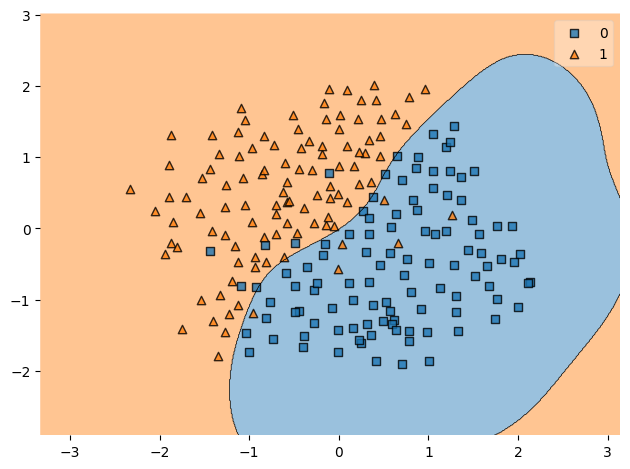

In [75]:
#Grafico la frontera de decisión, muestro los datos de entrenamiento y prueba
plot_decision_regions(X_3_std, y_3, mejor_svm)
plt.tight_layout()
plt.show()